In [ ]:
pip install skimpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 214 kB 9.9 MB/s 
     |████████████████████████████████| 1.1 MB 25.9 MB/s 
     |████████████████████████████████| 51 kB 1.9 MB/s 
  Attempting uninstall: Pygments
    Found existing installation: Pygments 2.6.1
    Uninstalling Pygments-2.6.1:
      Successfully uninstalled Pygments-2.6.1
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.7.1
    Uninstalling typeguard-2.7.1:
      Successfully uninstalled typeguard-2.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.


### Problem statement : We need to predict the components failure cause related to APS system or not. Which will be helpful in future for Truck operation and to reduce cost.

In [ ]:
### Importing the required libraries

import pandas as pd
import numpy as np
import warnings

from skimpy import skim
from statistics import median

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix

from sklearn import metrics 
from sklearn.model_selection import  train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

%matplotlib inline
warnings.filterwarnings('ignore')

## Attribute Information:

Attribute Information:
The attribute names of the data have been anonymized for
proprietary reasons. It consists of both single numerical
counters and histograms consisting of bins with different
conditions. Typically the histograms have open-ended
conditions at each end. For example if we measuring
the ambient temperature 'T' then the histogram could
be defined with 4 bins where:

bin 1 collect values for temperature T < -20
bin 2 collect values for temperature T >= -20 and T < 0
bin 3 collect values for temperature T >= 0 and T < 20
bin 4 collect values for temperature T > 20

| b1 | b2 | b3 | b4 |
-----------------------------
-20 0 20

The attributes are as follows: class, then
anonymized operational data. The operational data have
an identifier and a bin id, like 'Identifier_Bin'.
In total there are 171 attributes, of which 7 are
histogram variabels. Missing values are denoted by 'na

# 1. Data Injection

In [ ]:
### Uploading the local file
from google.colab import files

uploaded = files.upload()

Saving aps_failure_training_set.csv to aps_failure_training_set.csv


In [ ]:
### Reading the uploaded file
import io

df_train = pd.read_csv(io.StringIO(uploaded['aps_failure_training_set.csv'].decode('utf-8')),  on_bad_lines='skip', header=[14], na_values='na')

In [ ]:
### Uploading the local file
from google.colab import files

uploaded = files.upload()

Saving aps_failure_test_set.csv to aps_failure_test_set.csv


In [ ]:
df_test = pd.read_csv(io.StringIO(uploaded['aps_failure_test_set.csv'].decode('utf-8')),  on_bad_lines='skip', header=[14], na_values='na')

In [ ]:
### Getting the number of records in each dataset

print(f'Training dataset has : {df_train.shape[0]} number of records')
print(f'Test dataset has : {df_test.shape[0]} number of records')

Training dataset has : 60000 number of records
Test dataset has : 16000 number of records


In [ ]:
# Combining both data frames 

df = pd.concat([df_train, df_test])

In [ ]:
df[59998:60005]

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59998,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0
59999,neg,40222,NaN,6.980000e+02,628.0,0.0,0.0,0.0,0.0,0.0,...,440066.0,183200.0,344546.0,254068.0,225148.0,158304.0,170384.0,158.0,0.0,0.0
0,neg,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


#### Observation :
- Row index are not in order

In [ ]:
# Resetting index

df = df.reset_index(drop=True)

# Dropping the unnecessary 'index' column

#df.drop('index', axis=1, inplace=True)
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [ ]:
df[59998:60005]

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59998,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0
59999,neg,40222,NaN,6.980000e+02,628.0,0.0,0.0,0.0,0.0,0.0,...,440066.0,183200.0,344546.0,254068.0,225148.0,158304.0,170384.0,158.0,0.0,0.0
60000,neg,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
60001,neg,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
60002,neg,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
60003,neg,59816,NaN,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
60004,neg,1814,NaN,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


## Basic Operation

In [ ]:
df_bo = df.copy()

In [ ]:
print(f'There are {df_bo.shape[0]} number of rows(observations) and {df_bo.shape[1]} number of columns')

There are 76000 number of rows(observations) and 171 number of columns


#### Observation:
- All records are present
- There are 171 columns

In [ ]:
df_bo.columns

Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)

In [ ]:
# Printing basic information

df_bo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 99.2+ MB


#### Observation:
- There are 3 datatypes float, int, object
- Memory usage is 99.2 MB

In [ ]:
# Checking the datatypes

df_bo.dtypes

class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object

#### Observation:
- Class is of object type.
- aa_000 is of int type
- Rest all the columns are of float type

In [ ]:
# Checking null values

df_bo.isnull().sum()

class         0
aa_000        0
ab_000    58692
ac_000     4261
ad_000    18842
          ...  
ee_007      863
ee_008      863
ee_009      863
ef_000     3486
eg_000     3485
Length: 171, dtype: int64

In [ ]:
# Checking duplicate values

df_bo.duplicated().sum()

0

#### Observation:
- There is no duplicate values

In [ ]:
# Checking missing values

df_bo.isna().sum()

class         0
aa_000        0
ab_000    58692
ac_000     4261
ad_000    18842
          ...  
ee_007      863
ee_008      863
ee_009      863
ef_000     3486
eg_000     3485
Length: 171, dtype: int64

In [ ]:
# Summerizing the dataset

skim(df_bo)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 76000  │ │ float64     │ 169   │                                    │
│ │ Number of columns │ 171    │ │ object      │ 1     │                                    │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                    │
│                                └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┓  │
│ ┃        ┃ missin ┃ comple ┃ mean   ┃ sd     ┃ p0    ┃ p25    ┃ p75   ┃ p100   ┃ hist  ┃  │
│ ┃        ┃ g      ┃ te     ┃        ┃        ┃       ┃        ┃       ┃        ┃       ┃  │
│ ┃        ┃        ┃ rate   ┃        ┃        ┃       ┃        ┃       ┃        ┃       ┃  │
│ ┡━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━┩  │
│ │ aa_000 │      0 │      1 │  61000 │ 260000 │     0 │    860 │ 49000 │ 430000 │   █   │  │
│ │        │        │        │        │        │       │        │       │     00 │       │  │
│ │ ab_000 │  59000 │   0.23 │   0.73 │    3.3 │     0 │      0 │     0 │    200 │   █   │  │
│ │ ac_000 │   4300 │   0.94 │ 360000 │ 800000 │     0 │     16 │   970 │ 210000 │   █   │  │
│ │        │        │        │    000 │    000 │       │        │       │   0000 │   ▂   │  │
│ │ ad_000 │  19000 │   0.75 │ 150000 │ 360000 │     0 │     24 │   430 │ 860000 │   █   │  │
│ │        │        │        │        │     00 │       │        │       │   0000 │       │  │
│ │ ae_000 │   3200 │   0.96 │    6.7 │    150 │     0 │      0 │     0 │  21000 │   █   │  │
│ │ af_000 │   3200 │   0.96 │     11 │    200 │     0 │      0 │     0 │  20000 │   █   │  │
│ │ ag_000 │    860 │   0.99 │    200 │  18000 │     0 │      0 │     0 │ 340000 │   █   │  │
│ │        │        │        │        │        │       │        │       │      0 │       │  │
│ │ ag_001 │    860 │   0.99 │   1200 │  51000 │     0 │      0 │     0 │ 100000 │   █   │  │
│ │        │        │        │        │        │       │        │       │     00 │       │  │
│ │ ag_002 │    860 │   0.99 │   9700 │ 170000 │     0 │      0 │     0 │ 190000 │   █   │  │
│ │        │        │        │        │        │       │        │       │     00 │       │  │
│ │ ag_003 │    860 │   0.99 │  94000 │ 820000 │     0 │      0 │     0 │ 730000 │   █   │  │
│ │        │        │        │        │        │       │        │       │     00 │       │  │
│ │ ag_004 │    860 │   0.99 │ 450000 │ 250000 │     0 │    310 │ 50000 │ 230000 │   █   │  │
│ │        │        │        │        │      0 │       │        │       │    000 │       │  │
│ │ ag_005 │    860 │   0.99 │ 110000 │ 330000 │     0 │  14000 │ 92000 │ 180000 │   █   │  │
│ │        │        │        │      0 │      0 │       │        │     0 │    000 │       │  │
│ │ ag_006 │    860 │   0.99 │ 170000 │ 390000 │     0 │  11000 │ 19000 │ 940000 │   █   │  │
│ │        │        │        │      0 │      0 │       │        │    00 │     00 │       │  │
│ │ ag_007 │    860 │   0.99 │ 500000 │ 140000 │     0 │      0 │ 59000 │ 630000 │   █   │  │
│ │        │        │        │        │      0 │       │        │     0 │     00 │       │  │
│ │ ag_008 │    860 │   0.99 │  36000 │ 220000 │     0 │      0 │ 27000 │ 180000 │   █   │  │
│ │        │        │        │        │        │       │        │       │     00 │       │  │
│ │ ag_009 │    860 │   0.99 │   5300 │ 170000 │    

#### Observation:
- ab_000 has most number of missing values.
- Features in the dataset are not normally distributed.
- We will choose median imputation to handle the null values.

#### Statistical Analysis

In [ ]:
# For numeric columns

df_bo.describe().T

,count,mean,std,min,25%,50%,75%,max
aa_000,76000.0,6.115976e+04,2.647366e+05,0.0,860.0,30813.0,48840.0,4.294967e+07
ab_000,17308.0,7.255604e-01,3.311913e+00,0.0,0.0,0.0,0.0,2.040000e+02
ac_000,71739.0,3.564398e+08,7.952530e+08,0.0,16.0,154.0,970.0,2.130707e+09
ad_000,57158.0,1.506300e+05,3.590593e+07,0.0,24.0,128.0,430.0,8.584298e+09
ae_000,72810.0,6.736959e+00,1.534465e+02,0.0,0.0,0.0,0.0,2.105000e+04
...,...,...,...,...,...,...,...,...
ee_007,75137.0,3.475611e+05,1.707593e+06,0.0,112.0,41260.0,168046.0,1.195801e+08
ee_008,75137.0,1.398968e+05,4.692327e+05,0.0,0.0,3862.0,139500.0,1.926740e+07
ee_009,75137.0,8.424984e+03,4.875440e+04,0.0,0.0,0.0,2000.0,4.570398e+06
ef_000,72514.0,8.519734e-02,4.179600e+00,0.0,0.0,0.0,0.0,4.820000e+02


# Feature encoding
Converting the output levels into numeric

In [ ]:
#df_bo['class'] = df_bo['class'].map({'neg' : 0 , 'pos' : 1 })

def get_label(y):
  """
  This function converts the output class lavels 'neg', 'pos' to 0,1 
  """
  return y.replace(['neg', 'pos'], [0,1])

In [ ]:
df_bo['class'].unique()

array(['neg', 'pos'], dtype=object)

In [ ]:
df_bo['class'] = get_label(df_bo['class'])

In [ ]:
df_bo['class'].unique()

array([0, 1])

### Analysis of class feature
### Count plot : To check output distribution

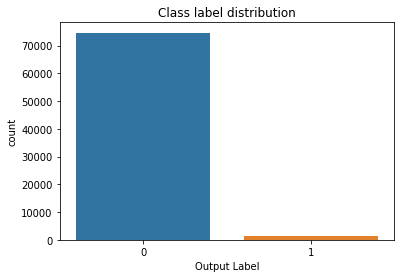

The negative number of observations :  74625
The positive number of observations :  1375


In [ ]:
sns.countplot(data=df_bo, x='class')
plt.title('Class label distribution')
plt.xlabel('Output Label')
plt.show()

print('The negative number of observations : ', df_bo['class'].value_counts()[0])
print('The positive number of observations : ', df_bo['class'].value_counts()[1])

#### Observation:
- The dataset is highly imbalanced. As we can see number of negative class is much more greater than positive class. We can do random sampling to upsample the minority class and resolve this problem. 

### Checking the single valued features
Out of all features we can check if any feature is holding single value and we will reduce it. That feature may not have that much impact in our output as it contains only one value for all the observations.

In [ ]:
def constant_value(df):
  '''
  This function takes df as input, removes the feature with std dev 0 and returns the new dataframe & feature having constant value
  '''
  constant_value_features = []
  info = df_bo.describe()
  for col in df_bo.columns:
    if info[col]['std'] == 0:
      constant_value_features.append(col)

  df_bo.drop(constant_value_features, axis=1, inplace=True)
  return df, constant_value_features

In [ ]:
df_bo, dropped_columns = constant_value(df_bo)

In [ ]:
print('The feature with constant value(std = 0) are : ', dropped_columns)

The feature with constant value(std = 0) are :  ['cd_000']


In [ ]:
print('Shape of the data after reducing the feature {}'.format(df_bo.shape))

Shape of the data after reducing the feature (76000, 170)


# Missing Value

In [ ]:
# Creating a dictonary to get store the column names as key and percentage of null values as values

nan_count = {value:list(df_bo.isnull().sum()*100/df_bo.shape[0])[index] for index,value in enumerate(df_bo.columns)}

In [ ]:
# Sorting the dictonary in descending order based on percentage of missing values

nan_count = {k:v for k,v in sorted(nan_count.items(), key=lambda item:item[1], reverse=True)}
nan_count

{'br_000': 82.09605263157894,
 'bq_000': 81.18815789473685,
 'bp_000': 79.55394736842105,
 'bo_000': 77.24868421052632,
 'ab_000': 77.22631578947369,
 'cr_000': 77.22631578947369,
 'bn_000': 73.31842105263158,
 'bm_000': 65.91447368421052,
 'bl_000': 45.39868421052632,
 'bk_000': 38.32631578947368,
 'ad_000': 24.792105263157893,
 'cf_000': 24.792105263157893,
 'cg_000': 24.792105263157893,
 'ch_000': 24.792105263157893,
 'co_000': 24.792105263157893,
 'ct_000': 23.060526315789474,
 'cu_000': 23.060526315789474,
 'cv_000': 23.060526315789474,
 'cx_000': 23.060526315789474,
 'cy_000': 23.060526315789474,
 'cz_000': 23.060526315789474,
 'da_000': 23.060526315789474,
 'db_000': 23.060526315789474,
 'dc_000': 23.060526315789474,
 'ec_00': 16.951315789473686,
 'cm_000': 16.388157894736842,
 'cl_000': 15.805263157894737,
 'ed_000': 15.805263157894737,
 'ak_000': 7.36578947368421,
 'ca_000': 7.318421052631579,
 'dm_000': 6.714473684210526,
 'df_000': 6.713157894736842,
 'dg_000': 6.71315789473

### Barplot
To display percentage of missing values

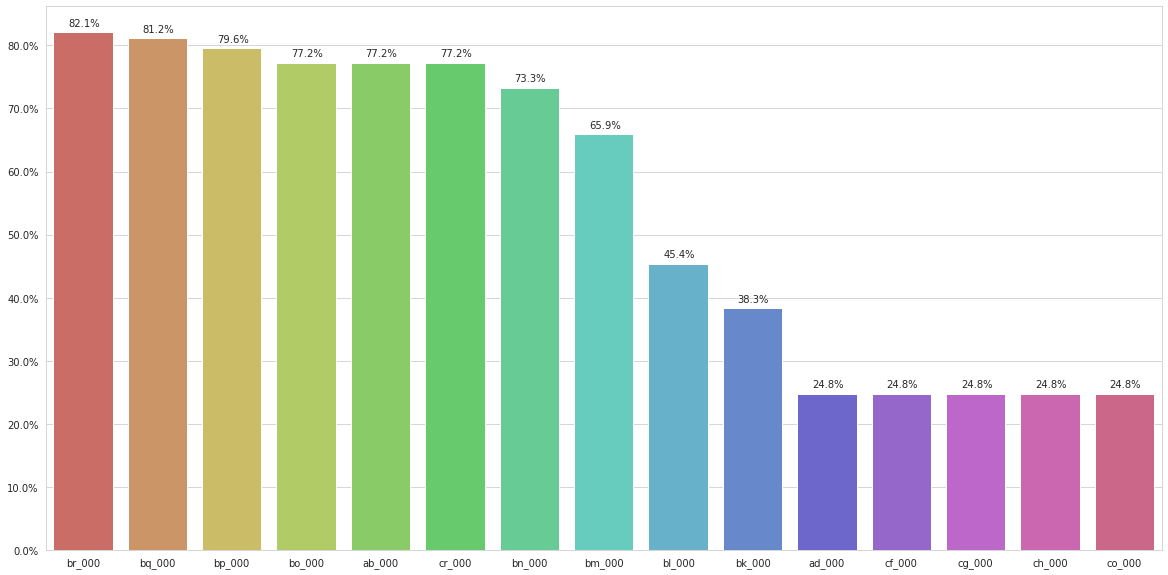

In [ ]:
## Plotting graph to display top 15 features with most number of missing values

sns.set_style(style='whitegrid')
plt.figure(figsize=(20,10))

plot = sns.barplot(x=list(nan_count.keys())[:15], y=list(nan_count.values())[:15], palette='hls')

# Add annotation above each bar signiifying their value
for p in plot.patches:
  plot.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+1))

# Make y axis more interpretable
plot.set_yticklabels(map('{:.1f}%'.format, plot.yaxis.get_majorticklocs()))
plt.show()

#### Observation:
- Feature 'br_000', 'bq_000', 'bp_000', 'bo_000', 'ab_000', 'o_000', 'bn_000', 'bm_000' has more than 50% null values.

### Handling missing values
Dropping features and rows

In [ ]:
def remove_na(df, nan_feat):
  '''
  This function removes features with more than 70% missing data,
  and removes rows that have NA values from features have less than 5% missing data. 
  '''

  # Removing features having more than 70 null values
  df = df.dropna(axis=1, thresh=22800)

  # Removing rows having NA from above created dictionaryof features
  df = df.dropna(subset=nan_feat)

  # Reset index
  df = df.reset_index(drop=True)

  return df

In [ ]:
print('Old shape of data : ', df_bo.shape)

Old shape of data :  (76000, 170)


In [ ]:
# List of features having less than 5% NA
na_5 = {k for k,v in nan_count.items() if v<5}

In [ ]:
df_null = remove_na(df_bo, na_5)

In [ ]:
print('Shape of the data after dropping values : ', df_null.shape)

Shape of the data after dropping values :  (70872, 163)


### Median Imputing

In [ ]:
imp = SimpleImputer(missing_values= np.nan, strategy='median')
for col in df_null.columns:
  df_null[col] = imp.fit_transform(df_null[col].values.reshape(-1,1))

In [ ]:
df_null.isnull().sum().sum()

0

### Displaying dropped features

In [ ]:
# Creating a list of features top 7 features having most number of missing values(>70%)
null_value_70 = list(nan_count.keys())[:7]

# Total Removed features
removed_features = null_value_70 + dropped_columns
print('Total removed features are : ', removed_features)

Total removed features are :  ['br_000', 'bq_000', 'bp_000', 'bo_000', 'ab_000', 'cr_000', 'bn_000', 'cd_000']


### Checking the duplicate records

In [ ]:
df_null.duplicated().sum()

1

In [ ]:
## Dropping duplicate records

df_null.drop_duplicates(inplace=True)

In [ ]:
df_null.duplicated().sum()

0

# Final Dataset

In [ ]:
df_final = df_null.copy()

## Separating the feature and label

In [ ]:
X = df_final.drop('class', axis=1)
y = df_final['class']

## Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=11)

In [ ]:
X_train.shape, y_train.shape

((55279, 162), (55279,))

In [ ]:
X_test.shape, y_test.shape

((15592, 162), (15592,))

#Feature Scaling 

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Logistic Regression

In [ ]:
log_reg = LogisticRegression()

log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred_log_reg = log_reg.predict(X_test_scaled)

### 5.1 Accuracy Score

In [ ]:
# Logistic Regression model accuracy after hyper-parameter tuning

print("Logistic Regression best param training accuracy score is : {}%".format(round(log_reg.score(X_train_scaled, y_train)*100, 2)))
print("Logistic Regression best param model's accuracy score is : {}%".format(round(accuracy_score(y_test, y_pred_log_reg)*100, 2)))

Logistic Regression best param training accuracy score is : 99.52%
Logistic Regression best param model's accuracy score is : 99.38%


#### 5.2 Roc-auc score

In [ ]:
y_train_predict_roc_log_reg = log_reg.predict_proba(X_train_scaled)

print("Extra Trees Classifier model with best parameter training training roc-auc score is : {}%".format(round(roc_auc_score(y_train, y_train_predict_roc_log_reg[:,1])*100)))

y_test_predict_roc_etc_log_reg = log_reg.predict_proba(X_test)

print("Extra Trees Classifier model with best parameter training roc-auc accuracy score is : {}%".format(round(roc_auc_score(y_test, y_test_predict_roc_etc_log_reg[:,1])*100)))

Extra Trees Classifier model with best parameter training training roc-auc score is : 98%
Extra Trees Classifier model with best parameter training roc-auc accuracy score is : 67%


#### 5.3 Confusion_matrix

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred_log_reg)
conf_mat

array([[15389,    20],
       [   76,   107]])

In [ ]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][0]
print('True Positive:',true_positive, '\nTrue Negative:',true_negative, '\nFalse Negative:',false_negative, '\nFalse Positive:',false_positive)

True Positive: 15389 
True Negative: 76 
False Negative: 76 
False Positive: 20


##### 5.4 Classification Report

In [ ]:
class_reprt_log_reg = classification_report(y_test, y_pred_log_reg)
print(class_reprt_log_reg)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     15409
         1.0       0.84      0.58      0.69       183

    accuracy                           0.99     15592
   macro avg       0.92      0.79      0.84     15592
weighted avg       0.99      0.99      0.99     15592



## Hyper parameter tuning
### Logistic Regression

In [ ]:
grid_param = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [0.01, 0.1, 1.0, 10],
    'max_iter' : [20, 40, 60, 80]
}

In [ ]:
grid_search_log_reg = GridSearchCV(estimator=log_reg, param_grid=grid_param, verbose=3, n_jobs=-1, cv=3)

In [ ]:
grid_search_log_reg.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1.0, 10],
                         'max_iter': [20, 40, 60, 80],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             verbose=3)

In [ ]:
grid_search_log_reg.best_params_

{'C': 1.0, 'max_iter': 40, 'penalty': 'l2'}

In [ ]:
model_with_bst_prm_log_reg = LogisticRegression(C = 1.0, max_iter = 40, penalty = 'l2')

In [ ]:
model_with_bst_prm_log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=40)

In [ ]:
y_pred_bst_prm_log_reg = model_with_bst_prm_log_reg.predict(X_test_scaled)

#### 5.1 Accuracy Score

In [ ]:
# LogisticRegression Model with best params accuracy score

print("LogisticRegression Model with best params training accuracy score is : {}%".format(round(model_with_bst_prm_log_reg.score(X_train_scaled, y_train)*100, 2)))
print("LogisticRegression Model with best params accuracy score is : {}%".format(round(accuracy_score(y_test, y_pred_bst_prm_log_reg)*100, 2)))

LogisticRegression Model with best params training accuracy score is : 99.52%
LogisticRegression Model with best params accuracy score is : 99.42%


#### 5.2 Roc-auc score

In [ ]:
y_train_predict_roc_bst_prm_log_reg = model_with_bst_prm_log_reg.predict_proba(X_train_scaled)

print("LogisticRegression  Model with best params training roc-auc score is : {}%".format(round(roc_auc_score(y_train, y_train_predict_roc_bst_prm_log_reg[:,1])*100)))

y_test_predict_roc_bst_prm_log_reg = model_with_bst_prm_log_reg.predict_proba(X_test_scaled)

print("LogisticRegression  Model with best params roc-auc accuracy score is : {}%".format(round(roc_auc_score(y_test, y_test_predict_roc_bst_prm_log_reg[:,1])*100)))

LogisticRegression  Model with best params training roc-auc score is : 98%
LogisticRegression  Model with best params roc-auc accuracy score is : 96%


#### 5.3 Confusion_matrix

In [ ]:
conf_mat_bst_prm_log_reg = confusion_matrix(y_test, y_pred_bst_prm_log_reg)
conf_mat_bst_prm_log_reg

array([[15389,    20],
       [   70,   113]])

In [ ]:
true_positive = conf_mat_bst_prm_log_reg[0][0]
false_positive = conf_mat_bst_prm_log_reg[0][1]
false_negative = conf_mat_bst_prm_log_reg[1][0]
true_negative = conf_mat_bst_prm_log_reg[1][0]
print('True Positive:',true_positive, '\nTrue Negative:',true_negative, '\nFalse Negative:',false_negative, '\nFalse Positive:',false_positive)

True Positive: 15389 
True Negative: 70 
False Negative: 70 
False Positive: 20


##### 5.4 Classification Report

In [ ]:
class_reprt_bst_prm_log_reg = classification_report(y_test, y_pred_bst_prm_log_reg)
print(class_reprt_bst_prm_log_reg)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     15409
         1.0       0.85      0.62      0.72       183

    accuracy                           0.99     15592
   macro avg       0.92      0.81      0.86     15592
weighted avg       0.99      0.99      0.99     15592



## Hyper-parameter tuning
### Randomized Searh CV

In [ ]:
dist_param = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [0.01, 0.1, 1.0, 10],
    'max_iter' : [20, 40, 60, 80]
}

In [ ]:
randomized_search_log_reg = RandomizedSearchCV(estimator=log_reg, param_distributions=dist_param, cv = 3, n_iter = 10, n_jobs=-1)

In [ ]:
randomized_search_log_reg.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1.0, 10],
                                        'max_iter': [20, 40, 60, 80],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none']})

In [ ]:
randomized_search_log_reg.best_params_

{'penalty': 'none', 'max_iter': 40, 'C': 0.01}

In [ ]:
model_with_bst_prm_log_reg_r = LogisticRegression(penalty = 'l2', max_iter = 40, C = 0.1, verbose=3, n_jobs=-1)

In [ ]:
model_with_bst_prm_log_reg_r.fit(X_train_scaled, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.0s finished


LogisticRegression(C=0.1, max_iter=40, n_jobs=-1, verbose=3)

In [ ]:
y_pred_bst_prm_log_reg_r = model_with_bst_prm_log_reg_r.predict(X_test_scaled)

#### 5.1 Accuracy Score

In [ ]:
# LogisticRegression Model with best params  randomized search accuracy score

print("LogisticRegression Model with best params randomized search training accuracy score is : {}%".format(round(model_with_bst_prm_log_reg_r.score(X_train_scaled, y_train)*100, 2)))
print("LogisticRegression Model with best params randomized search accuracy score is : {}%".format(round(accuracy_score(y_test, y_pred_bst_prm_log_reg_r)*100, 2)))

LogisticRegression Model with best params randomized search training accuracy score is : 99.51%
LogisticRegression Model with best params randomized search accuracy score is : 99.44%


#### 5.2 Roc-auc score

In [ ]:
y_train_predict_roc_bst_prm_log_reg_r = model_with_bst_prm_log_reg_r.predict_proba(X_train_scaled)

print("LogisticRegression  Model with best params randomized search training roc-auc score is : {}%".format(round(roc_auc_score(y_train, y_train_predict_roc_bst_prm_log_reg_r[:,1])*100)))

y_test_predict_roc_bst_prm_log_reg_r = model_with_bst_prm_log_reg_r.predict_proba(X_test_scaled)

print("LogisticRegression  Model with best params randomized search roc-auc accuracy score is : {}%".format(round(roc_auc_score(y_test, y_test_predict_roc_bst_prm_log_reg_r[:,1])*100)))

LogisticRegression  Model with best params randomized search training roc-auc score is : 98%
LogisticRegression  Model with best params randomized search roc-auc accuracy score is : 96%


#### 5.3 Confusion_matrix

In [ ]:
conf_mat_bst_prm_log_reg_r = confusion_matrix(y_test, y_pred_bst_prm_log_reg_r)
conf_mat_bst_prm_log_reg_r

array([[15389,    20],
       [   68,   115]])

In [ ]:
true_positive = conf_mat_bst_prm_log_reg_r[0][0]
false_positive = conf_mat_bst_prm_log_reg_r[0][1]
false_negative = conf_mat_bst_prm_log_reg_r[1][0]
true_negative = conf_mat_bst_prm_log_reg_r[1][0]
print('True Positive:',true_positive, '\nTrue Negative:',true_negative, '\nFalse Negative:',false_negative, '\nFalse Positive:',false_positive)

True Positive: 15389 
True Negative: 68 
False Negative: 68 
False Positive: 20


##### 5.4 Classification Report

In [ ]:
class_reprt_bst_prm_log_reg_r = classification_report(y_test, y_pred_bst_prm_log_reg_r)
print(class_reprt_bst_prm_log_reg_r)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     15409
         1.0       0.85      0.63      0.72       183

    accuracy                           0.99     15592
   macro avg       0.92      0.81      0.86     15592
weighted avg       0.99      0.99      0.99     15592

